# **EMPLOYEE ATTRITION PREDICTION**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Preprocessing for training datasets**](#Section51)
  - **5.2** [**Data Preprocessing for unseen datasets**](#Section52)
  - **5.3** [**Post Profiling Report**](#Section53)

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing**](#Section7)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Model Development**](#Section81)
  - **8.2** [**Model Tunning**](#Section82)
  - **8.3** [**Predicting on unseen data**](#Section83)

**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

---
HR Department's New Initiative to Retain Employees
Your client for this project is the HR Department at a software company.
Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
The idea is to use data to predict whether an employee is likely to leave.
They only want to deal with the data that is related to permanent employees.
Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly. This suffers from the following problems:

This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
The second problem is these insights can't be aggregated and interlaced across all employees who have left.
The third is that it is too late by the time the proposed policy changes take effect.
The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.

<a name = Section2></a>

---
# **2. Problem Statement**
---

Your Role :-
You are given datasets of past employees and their status (still employed or already left).
Your task is to build a classification model using the datasets.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.
Problem Specifics
Deliverable: Predict whether an employee will stay or leave.

Machine learning task: Classification

Target variable: Status (Employed/Left)

Win condition: N/A (best possible model)

<a name = Section3></a>

---
# **3. Installing and importing libraries**
---

<a name = Section31></a>
### **3.1 Instlling Libraries**

In [244]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q ydata-profiling

<a name = Section32></a>
### **3.2 Upgrading Libraries**

In [245]:
!pip install -q --upgrade ydata-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [246]:
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                           # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', 50)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import classification_report
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

#**department_data**

This dataset contains information about each department. The schema of the dataset is as follows:

|Sl|Feature|Description|
|:--|:--|:--|
|01| dept_id                | Unique Department Code |
|02| dept_name              | Name of the Department|
|03| dept_head              | Name of the Head of the Department|

#**employee_details_data**

This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

|Sl|Feature|Description|
|:--|:--|:--|
|01| employee_id        | Unique Department Code |
|02| age                | Name of the Department|
|03| gender             | Name of the Head of the Department|
|04| marital_status     | Marital Status of the employee|

#**employee_data**

This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

**Target variable**

|Sl|Feature|Description|
|:--|:--|:--|
|01| status        | Current employment status (Employed / Left) |

**Administrative information**

|Sl|Feature|Description|
|:--|:--|:--|
|01| department | Department to which the employees belong(ed) to |
|02| salary     | Salary level with respect to rest of their department |
|03| tenure     | Number of years at the company |
|04| recently_promoted | Was the employee promoted in the last 3 years? |
|05| employee_id       | Unique ID Number for each employee |

**Workload information**

|Sl|Feature|Description|
|:--|:--|:--|
|01| n_projects       | Number of projects employee has worked on |
|02| avg_monthly_hrs  | Average number of hours worked per month |


**Mutual evaluation information**

|Sl|Feature|Description|
|:--|:--|:--|
|01| satisfaction| Score for employee’s satisfaction with the company (higher is better) |
|02| last_evaluation| Score for most recent evaluation of employee (higher is better) |
|03| filed_complaint| Has the employee filed a formal complaint in the last 3 years? |

Final Dataframe

|Sl|Feature|Description|
|:--|:--|:--|
|01| employee_id       | Unique ID Number for each employee |
|02| age                | Name of the Department|
|03| gender             | Name of the Head of the Department|
|04| marital_status     | Marital Status of the employee|
|05| department | Department to which the employees belong(ed) to |
|06| dept_name              | Name of the Department|
|07| dept_head              | Name of the Head of the Department|
|08| salary     | Salary level with respect to rest of their department |
|09| tenure     | Number of years at the company |
|10| recently_promoted | Was the employee promoted in the last 3 years? |
|11| n_projects       | Number of projects employee has worked on |
|12| avg_monthly_hrs  | Average number of hours worked per month |
|13| satisfaction| Score for employee’s satisfaction with the company (higher is better) |
|14| last_evaluation| Score for most recent evaluation of employee (higher is better) |
|15| filed_complaint| Has the employee filed a formal complaint in the last 3 years? |
|16| status        | Current employment status (Employed / Left) |


In [247]:
dept_data_url = f'https://drive.google.com/uc?id=1jhNViuU8w2pXyJmtJxj7JzlIDr99nY1p'
emp_details_data_url = f'https://drive.google.com/uc?id=1wb8JYzHZ_TDmtwxvp_M7uO3Nc9PQ5OhA'
emp_data_url = f'https://drive.google.com/uc?id=123WpSDYpbbsAmmUNOswdM83NtR40EEAH'
department_data = pd.read_csv(dept_data_url)
employee_details_data = pd.read_csv(emp_details_data_url)
employee_data_url = pd.read_csv(emp_data_url)
unseen_data = pd.read_excel("/content/unseen_data/GCD_Capstone_Project_unseen_data.xlsx")
#unseen_data = pd.read_excel("/content/sample_data/GCD_Capstone_Project_unseen_data.xlsx")
employee_details_data_unseen = employee_details_data



<a name = Section41></a>
### **4.1 Data Description**
- In this section, we will acquire and describe the three datasets: `department_data`, `employee_details_data`, and `employee_data`. We will provide information about the data sources, the variables included in each dataset, and their data types.

In [248]:
print(department_data.shape)
department_data.describe()

(11, 3)


,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-IT,IT,Henry Adey
freq,1,1,1


In [249]:
print(employee_details_data.shape)
employee_details_data.describe()

(14245, 4)


,employee_id,age
count,14245.00000,14245.00000
mean,112123.05054,32.88993
std,8500.45734,9.97083
min,100101.00000,22.00000
25%,105775.00000,24.00000
50%,111298.00000,29.00000
75%,116658.00000,41.00000
max,148988.00000,57.00000


In [250]:
print(employee_data.shape)
employee_data.describe()

(13966, 11)


,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure,employee_id
count,13966.00000,13966.00000,13966.00000,13966.00000,13966.00000,13966.00000
mean,201.07160,0.71894,3.80052,0.62132,3.49771,112113.46219
std,49.94949,0.16459,1.23530,0.25046,1.46043,8487.69767
min,96.00000,0.31617,2.00000,0.04006,2.00000,100101.00000
25%,156.00000,0.57736,3.00000,0.45037,3.00000,105766.25000
50%,200.00000,0.72473,4.00000,0.65255,3.00000,111293.50000
75%,245.00000,0.85816,5.00000,0.82491,4.00000,116657.50000
max,310.00000,1.00000,7.00000,1.00000,10.00000,148988.00000


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [251]:
department_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [252]:
employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [253]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13966 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13966 non-null  float64
 1   department         13966 non-null  object 
 2   filed_complaint    13966 non-null  bool   
 3   last_evaluation    13966 non-null  float64
 4   n_projects         13966 non-null  int64  
 5   recently_promoted  13966 non-null  bool   
 6   salary             13966 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             13966 non-null  object 
 9   tenure             13966 non-null  float64
 10  employee_id        13966 non-null  int64  
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 1.1+ MB


**Observations:**
- There are **3 features in department_data and 4 features in employee_details_data and 11 features in employee_data**
- 14245 records in employee_details_data with 4 features and no duplicacy with no NaN values
- In employee_data total 14150 records with 11 features




<a name = Section5></a>
# **5. Data Pre-Processing**

<a name = Section51></a>
### **5.1 Data Preprocessing for training datasets**

In [254]:
employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [255]:
employee_details_data['gender'].value_counts()

,count
gender,
Male,9382
Female,4863


In [256]:
employee_details_data['marital_status'].value_counts()

,count
marital_status,
Unmarried,7283
Married,6962


<Axes: >

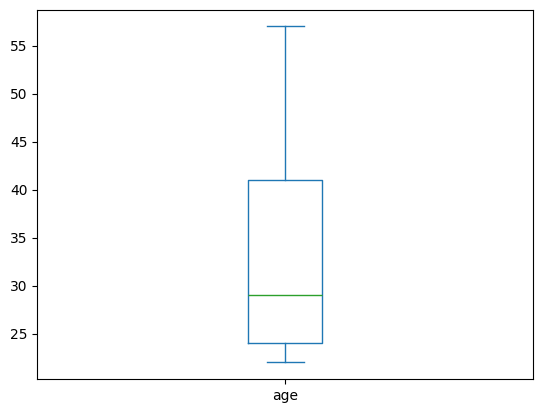

In [257]:
employee_details_data['age'].plot.box()

In [258]:
employee_details_data[employee_details_data.isnull().any(axis=1)]

,employee_id,age,gender,marital_status


In [259]:
employee_details_data[employee_details_data['employee_id']==0]

,employee_id,age,gender,marital_status


In [260]:
employee_data['department'].value_counts()

,count
department,
D00-SS,4601
D00-ENG,2573
D00-SP,2108
D00-IT,1359
D00-PD,853
D00-MT,812
D00-FN,722
D00-MN,590
D00-AD,175


In [261]:
employee_data = employee_data[employee_data['department']!='D00-TP']

In [262]:
employee_data['department'].value_counts()

,count
department,
D00-SS,4601
D00-ENG,2573
D00-SP,2108
D00-IT,1359
D00-PD,853
D00-MT,812
D00-FN,722
D00-MN,590
D00-AD,175


In [263]:
duplicateIds =employee_data[employee_data.duplicated()]['employee_id']

In [264]:
duplicateIds.size

0

In [265]:
employee_data[employee_data['employee_id'].isin(duplicateIds)]


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [266]:
employee_data[employee_data['employee_id']==0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


<Axes: >

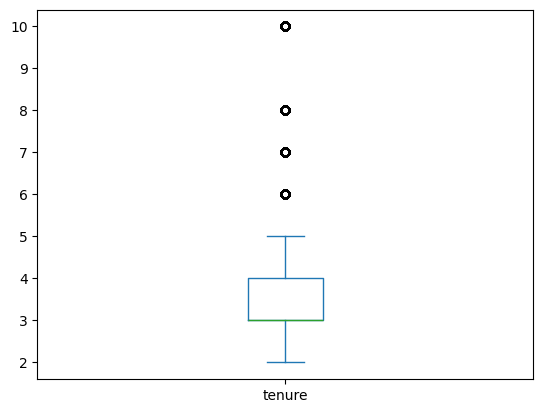

In [267]:
employee_data['tenure'].plot.box()

In [268]:
employee_data[employee_data.isnull().any(axis=1)]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [269]:
employee_data['recently_promoted'].value_counts()

,count
recently_promoted,
False,13669
True,297


In [270]:
employee_data['recently_promoted'].isnull().sum()

0

In [271]:
employee_data['filed_complaint'].value_counts()

,count
filed_complaint,
False,11954
True,2012


In [272]:
employee_data['filed_complaint'].isnull().sum()

0

In [273]:
employee_data['filed_complaint'].fillna(0,inplace=True)
employee_data['recently_promoted'].fillna(0,inplace=True)
employee_data['filed_complaint'] =employee_data['filed_complaint'].astype(bool)
employee_data['recently_promoted']= employee_data['recently_promoted'].astype(bool)


In [274]:
employee_data['recently_promoted'].value_counts()

,count
recently_promoted,
False,13669
True,297


In [275]:
employee_data['filed_complaint'].value_counts()

,count
filed_complaint,
False,11954
True,2012


In [276]:
employee_data[employee_data.isnull().any(axis=1)]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [277]:
employee_data['department'].value_counts()

,count
department,
D00-SS,4601
D00-ENG,2573
D00-SP,2108
D00-IT,1359
D00-PD,853
D00-MT,812
D00-FN,722
D00-MN,590
D00-AD,175


In [278]:
employee_data['department'].value_counts()

,count
department,
D00-SS,4601
D00-ENG,2573
D00-SP,2108
D00-IT,1359
D00-PD,853
D00-MT,812
D00-FN,722
D00-MN,590
D00-AD,175


In [279]:
employee_data['department'].isnull().sum()

0

In [280]:
employee_data[employee_data.isnull().any(axis=1)]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [281]:
employee_data['last_evaluation'].isnull().sum()

0

In [282]:
employee_data['last_evaluation'].value_counts()

,count
last_evaluation,
0.72473,1338
1.00000,356
0.89625,3
0.60712,2
0.74246,2
...,...
0.62302,1
0.66808,1
0.89160,1


In [283]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13966 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13966 non-null  float64
 1   department         13966 non-null  object 
 2   filed_complaint    13966 non-null  bool   
 3   last_evaluation    13966 non-null  float64
 4   n_projects         13966 non-null  int64  
 5   recently_promoted  13966 non-null  bool   
 6   salary             13966 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             13966 non-null  object 
 9   tenure             13966 non-null  float64
 10  employee_id        13966 non-null  int64  
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 1.1+ MB


In [284]:
employee_data['last_evaluation'] = employee_data['last_evaluation'].fillna(employee_data['last_evaluation'].median())

In [285]:
employee_data[employee_data.isnull().any(axis=1)]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [286]:
employee_data['satisfaction'].isnull().sum()

0

In [287]:
employee_data['satisfaction'].value_counts()

,count
satisfaction,
1.00000,356
0.47633,2
0.36349,2
0.48416,2
0.94739,2
...,...
0.58344,1
0.54434,1
0.11159,1


In [288]:
employee_data['satisfaction'] = employee_data['satisfaction'].fillna(employee_data['satisfaction'].median())
employee_data['tenure'] = employee_data['tenure'].fillna(employee_data['tenure'].median())

In [289]:
employee_data[employee_data.isnull().any(axis=1)]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [290]:
employee_data[employee_data.duplicated()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [291]:
employee_data.drop_duplicates(subset=['employee_id'], inplace=True)

In [292]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13966 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13966 non-null  float64
 1   department         13966 non-null  object 
 2   filed_complaint    13966 non-null  bool   
 3   last_evaluation    13966 non-null  float64
 4   n_projects         13966 non-null  int64  
 5   recently_promoted  13966 non-null  bool   
 6   salary             13966 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             13966 non-null  object 
 9   tenure             13966 non-null  float64
 10  employee_id        13966 non-null  int64  
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 1.1+ MB


In [293]:
employee_data[employee_data['employee_id']==0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [294]:
employee_data = employee_data[employee_data['employee_id'] != 0]

In [295]:
employee_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13966 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13966 non-null  float64
 1   department         13966 non-null  object 
 2   filed_complaint    13966 non-null  bool   
 3   last_evaluation    13966 non-null  float64
 4   n_projects         13966 non-null  int64  
 5   recently_promoted  13966 non-null  bool   
 6   salary             13966 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             13966 non-null  object 
 9   tenure             13966 non-null  float64
 10  employee_id        13966 non-null  int64  
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 1.1+ MB


In [296]:
employee_details_data

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married
...,...,...,...,...
14240,111781,26,Male,Unmarried
14241,100372,35,Male,Married
14242,128083,30,Female,Married
14243,118487,24,Male,Unmarried


In [297]:
employee_data['department'].value_counts()

,count
department,
D00-SS,4601
D00-ENG,2573
D00-SP,2108
D00-IT,1359
D00-PD,853
D00-MT,812
D00-FN,722
D00-MN,590
D00-AD,175


In [298]:
department_data = department_data[department_data['dept_id']!='D00-TP']

In [299]:
depts_names =department_data['dept_id'].to_list()

In [300]:
depts_names

['D00-IT',
 'D00-SS',
 'D00-ENG',
 'D00-SP',
 'D00-FN',
 'D00-PR',
 'D00-AD',
 'D00-MN',
 'D00-MT',
 'D00-PD']

In [301]:
employee_details_data =employee_details_data[employee_details_data['employee_id'].isin(employee_data['employee_id'])]

In [302]:
employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13966 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     13966 non-null  int64 
 1   age             13966 non-null  int64 
 2   gender          13966 non-null  object
 3   marital_status  13966 non-null  object
dtypes: int64(2), object(2)
memory usage: 545.5+ KB


In [303]:
employee_data['department'].value_counts()

,count
department,
D00-SS,4601
D00-ENG,2573
D00-SP,2108
D00-IT,1359
D00-PD,853
D00-MT,812
D00-FN,722
D00-MN,590
D00-AD,175


In [304]:
 employee_data['department'].unique()

array(['D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-FN'], dtype=object)

In [305]:
employee_data['department'] = employee_data['department'].replace('#NAME?', np.nan)

In [306]:
employee_data['department'] = employee_data['department'].replace('-IT', "D00-IT")

In [307]:
employee_data['department'].unique()

array(['D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-FN'], dtype=object)

In [308]:
employee_data['department'].mode()

,department
0,D00-SS


In [309]:
employee_data['department'] = employee_data['department'].fillna(employee_data['department'].mode()[0])

In [310]:
unique_departments = employee_data['department'].unique().tolist()

In [311]:
unique_departments

['D00-SS',
 'D00-SP',
 'D00-MT',
 'D00-PD',
 'D00-IT',
 'D00-AD',
 'D00-MN',
 'D00-ENG',
 'D00-PR',
 'D00-FN']

In [312]:
employee_data['department'].value_counts()

,count
department,
D00-SS,4601
D00-ENG,2573
D00-SP,2108
D00-IT,1359
D00-PD,853
D00-MT,812
D00-FN,722
D00-MN,590
D00-AD,175


In [313]:
diff = list(set(unique_departments) - set(depts_names))
print(diff)

[]


In [314]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13966 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13966 non-null  float64
 1   department         13966 non-null  object 
 2   filed_complaint    13966 non-null  bool   
 3   last_evaluation    13966 non-null  float64
 4   n_projects         13966 non-null  int64  
 5   recently_promoted  13966 non-null  bool   
 6   salary             13966 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             13966 non-null  object 
 9   tenure             13966 non-null  float64
 10  employee_id        13966 non-null  int64  
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 1.1+ MB


In [315]:
employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13966 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     13966 non-null  int64 
 1   age             13966 non-null  int64 
 2   gender          13966 non-null  object
 3   marital_status  13966 non-null  object
dtypes: int64(2), object(2)
memory usage: 545.5+ KB


In [316]:
# Merge employee_data and employee_details_data on 'employee_id'
merged_data = pd.merge(employee_data, employee_details_data, on='employee_id', how='left')

# Merge the result with department_data on 'dept_id' and 'department'
final_merged_data = pd.merge(merged_data, department_data, left_on='department', right_on='dept_id', how='left')


In [317]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13966 entries, 0 to 13965
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13966 non-null  float64
 1   department         13966 non-null  object 
 2   filed_complaint    13966 non-null  bool   
 3   last_evaluation    13966 non-null  float64
 4   n_projects         13966 non-null  int64  
 5   recently_promoted  13966 non-null  bool   
 6   salary             13966 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             13966 non-null  object 
 9   tenure             13966 non-null  float64
 10  employee_id        13966 non-null  int64  
 11  age                13966 non-null  int64  
 12  gender             13966 non-null  object 
 13  marital_status     13966 non-null  object 
 14  dept_id            13966 non-null  object 
 15  dept_name          13966 non-null  object 
 16  dept_head          139

In [318]:
#lets delete redundantId like dept_id and also lets delete empId

final_merged_data = final_merged_data.drop(['employee_id', 'dept_id'], axis=1)

In [319]:
final_merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13966 entries, 0 to 13965
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13966 non-null  float64
 1   department         13966 non-null  object 
 2   filed_complaint    13966 non-null  bool   
 3   last_evaluation    13966 non-null  float64
 4   n_projects         13966 non-null  int64  
 5   recently_promoted  13966 non-null  bool   
 6   salary             13966 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             13966 non-null  object 
 9   tenure             13966 non-null  float64
 10  age                13966 non-null  int64  
 11  gender             13966 non-null  object 
 12  marital_status     13966 non-null  object 
 13  dept_name          13966 non-null  object 
 14  dept_head          13966 non-null  object 
dtypes: bool(2), float64(4), int64(2), object(7)
memory usage: 1.4+ MB


In [320]:
final_merged_data.isnull().sum()

,0
avg_monthly_hrs,0
department,0
filed_complaint,0
last_evaluation,0
n_projects,0
recently_promoted,0
salary,0
satisfaction,0
status,0
tenure,0


<a name = Section52></a>
### **5.2 Data Preprocessing for unseen datasets**

In [321]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [322]:
unseen_data['department'].value_counts()

,count
department,
D00-SS,27
D00-ENG,17
D00-SP,13
D00-IT,9
D00-PD,7
D00-MT,7
D00-FN,6
D00-MN,5
D00-TP,3


In [323]:
employee_details_data.shape

(13966, 4)

In [324]:
unseen_data = pd.merge(unseen_data, employee_details_data_unseen, on='employee_id', how='left')

In [325]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
 10  age                100 non-null    int64  
 11  gender             100 non-null    object 
 12  marital_status     100 non-null    object 
dtypes: float64(5), int64(4), object(4)
memory usage: 10.3+ KB


In [326]:
unseen_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status
0,134,D00-IT,NaN,0.52884,2,NaN,low,0.40046,3.00000,119045,27,Male,Unmarried
1,221,D00-PD,NaN,0.78456,2,NaN,low,0.75951,3.00000,112223,23,Male,Unmarried
2,156,D00-SS,NaN,0.54518,2,NaN,medium,0.33646,3.00000,103924,26,Male,Unmarried
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.83204,2.00000,105922,52,Male,Married
4,135,D00-SS,NaN,0.45464,2,NaN,low,0.32072,5.00000,103297,27,Male,Unmarried


In [327]:
unseen_data['marital_status'].value_counts()

,count
marital_status,
Married,51
Unmarried,49


In [328]:
unseen_data['last_evaluation'] = unseen_data['last_evaluation'].fillna(unseen_data['last_evaluation'].median())
unseen_data['satisfaction'] = unseen_data['satisfaction'].fillna(unseen_data['satisfaction'].median())
unseen_data['tenure'] = unseen_data['tenure'].fillna(unseen_data['tenure'].median())
unseen_data['filed_complaint'] = unseen_data['filed_complaint'].fillna(0).astype(int)
unseen_data['recently_promoted'] = unseen_data['recently_promoted'].fillna(0).astype(int)
unseen_data['department'] = unseen_data['department'].fillna(unseen_data['department'].mode()[0])

In [329]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    int64  
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    int64  
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    float64
 9   employee_id        100 non-null    int64  
 10  age                100 non-null    int64  
 11  gender             100 non-null    object 
 12  marital_status     100 non-null    object 
dtypes: float64(3), int64(6), object(4)
memory usage: 10.3+ KB


In [330]:
unseen_data['filed_complaint'] = unseen_data['filed_complaint'].astype(bool)
unseen_data['recently_promoted'] = unseen_data['recently_promoted'].astype(bool)


In [331]:
unseen_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status
0,134,D00-IT,False,0.52884,2,False,low,0.40046,3.00000,119045,27,Male,Unmarried
1,221,D00-PD,False,0.78456,2,False,low,0.75951,3.00000,112223,23,Male,Unmarried
2,156,D00-SS,False,0.54518,2,False,medium,0.33646,3.00000,103924,26,Male,Unmarried
3,133,D00-PR,False,0.74813,4,False,medium,0.83204,2.00000,105922,52,Male,Married
4,135,D00-SS,False,0.45464,2,False,low,0.32072,5.00000,103297,27,Male,Unmarried


In [332]:
final_merged_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,dept_name,dept_head
0,246.00000,D00-SS,False,0.86684,6,False,medium,0.13442,Left,4.00000,42,Female,Married,Sales,Edward J Bayley
1,134.00000,D00-SS,False,0.55572,2,False,low,0.51104,Left,3.00000,23,Female,Unmarried,Sales,Edward J Bayley
2,156.00000,D00-SS,True,0.47408,2,False,medium,0.40510,Left,3.00000,24,Female,Unmarried,Sales,Edward J Bayley
3,256.00000,D00-SP,False,0.96136,6,False,low,0.15297,Left,4.00000,51,Female,Married,Support,Amelia Westray
4,146.00000,D00-SS,False,0.50735,2,False,medium,0.43484,Left,3.00000,23,Female,Unmarried,Sales,Edward J Bayley


<a name = Section53></a>
### **5.3 Post Profiling Report**

- In post profiling, we identify the changes over cleansed data.

In [333]:
profile = ProfileReport(final_merged_data)
profile.to_file(output_file="Post Profiling Report.html")
print('Post-Profiling Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Post-Profiling Accomplished!


<a name = Section6></a>
# **6. Exploratory Data Analysis**

In [334]:
final_merged_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,dept_name,dept_head
0,246.00000,D00-SS,False,0.86684,6,False,medium,0.13442,Left,4.00000,42,Female,Married,Sales,Edward J Bayley
1,134.00000,D00-SS,False,0.55572,2,False,low,0.51104,Left,3.00000,23,Female,Unmarried,Sales,Edward J Bayley
2,156.00000,D00-SS,True,0.47408,2,False,medium,0.40510,Left,3.00000,24,Female,Unmarried,Sales,Edward J Bayley
3,256.00000,D00-SP,False,0.96136,6,False,low,0.15297,Left,4.00000,51,Female,Married,Support,Amelia Westray
4,146.00000,D00-SS,False,0.50735,2,False,medium,0.43484,Left,3.00000,23,Female,Unmarried,Sales,Edward J Bayley


In [335]:
final_merged_data['status'].value_counts()

,count
status,
Employed,10631
Left,3335


---
**<h4>Question 1:** Distributions of numerical variables </h4>

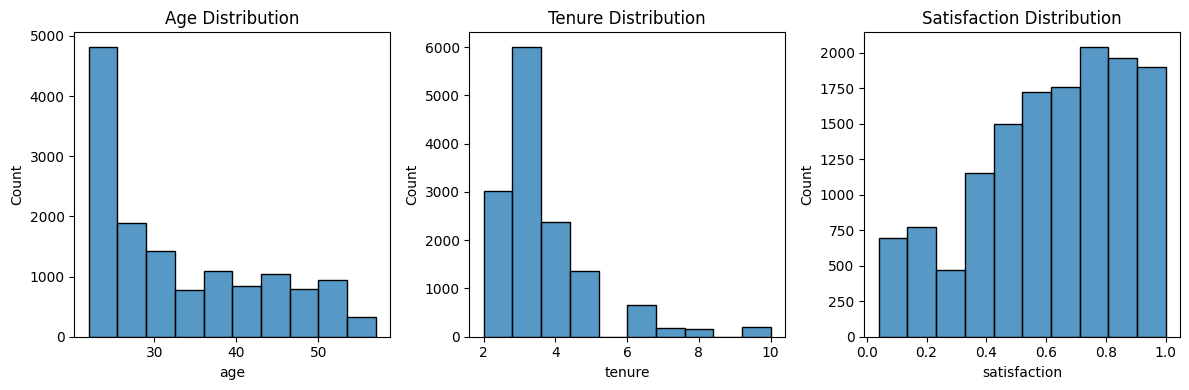

In [336]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(final_merged_data['age'], bins=10)
plt.title('Age Distribution')
plt.subplot(1, 3, 2)
sns.histplot(final_merged_data['tenure'], bins=10)
plt.title('Tenure Distribution')
plt.subplot(1, 3, 3)
sns.histplot(final_merged_data['satisfaction'], bins=10)
plt.title('Satisfaction Distribution')
plt.tight_layout()
plt.show()

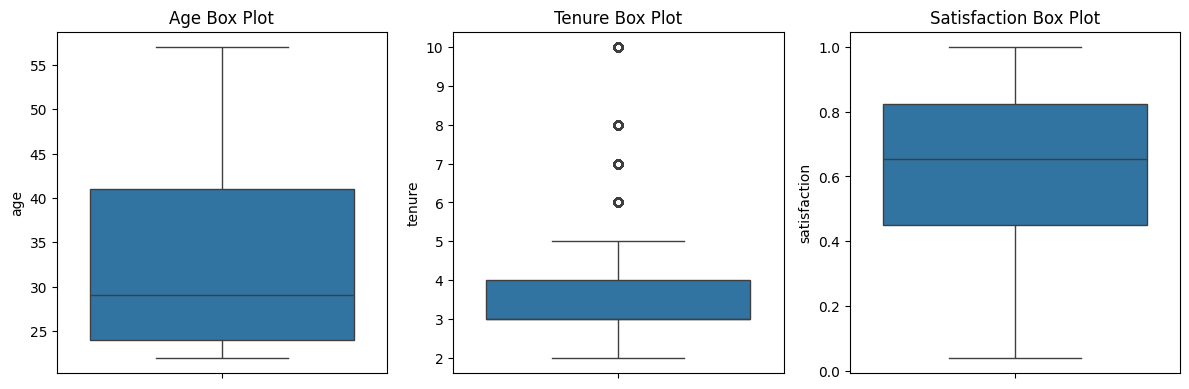

In [337]:
# Box plots for age, tenure, and satisfaction
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(y=final_merged_data['age'])
plt.title('Age Box Plot')
plt.subplot(1, 3, 2)
sns.boxplot(y=final_merged_data['tenure'])
plt.title('Tenure Box Plot')
plt.subplot(1, 3, 3)
sns.boxplot(y=final_merged_data['satisfaction'])
plt.title('Satisfaction Box Plot')
plt.tight_layout()
plt.show()

**<h4>Question 2:** Frequencies and Proportions of Categorical Features </h4>

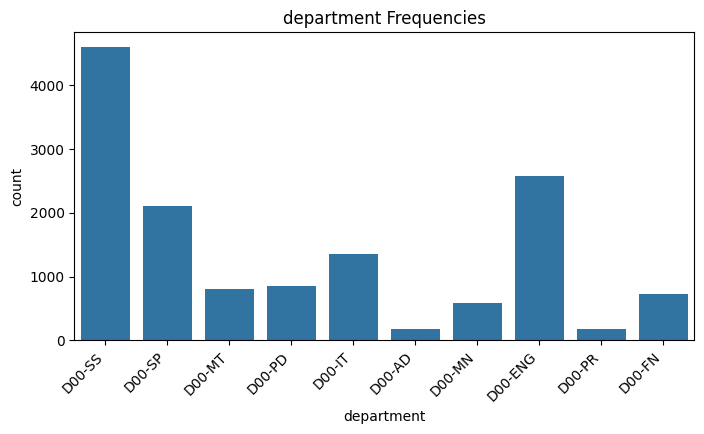

department Proportions:
department
D00-SS    0.32944
D00-ENG   0.18423
D00-SP    0.15094
D00-IT    0.09731
D00-PD    0.06108
D00-MT    0.05814
D00-FN    0.05170
D00-MN    0.04225
D00-AD    0.01253
D00-PR    0.01239
Name: proportion, dtype: float64



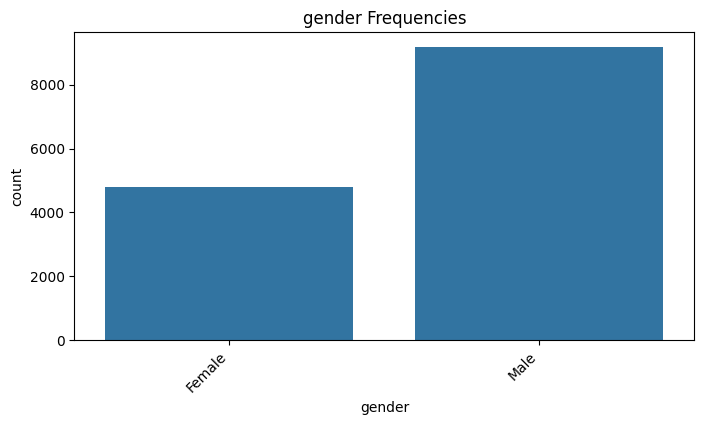

gender Proportions:
gender
Male     0.65738
Female   0.34262
Name: proportion, dtype: float64



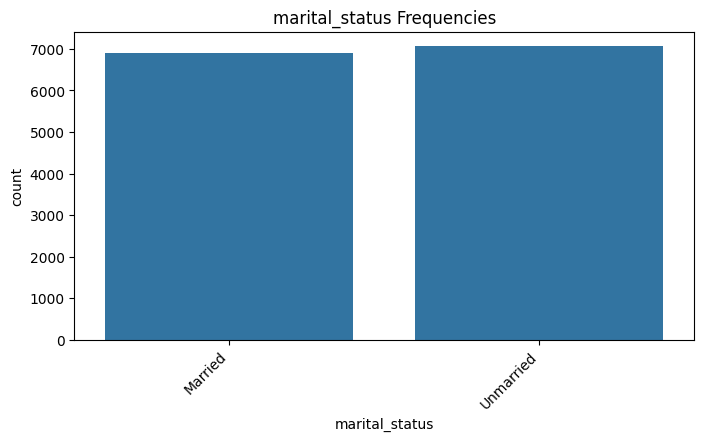

marital_status Proportions:
marital_status
Unmarried   0.50566
Married     0.49434
Name: proportion, dtype: float64



In [338]:
categorical_features = ['department', 'gender', 'marital_status']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=final_merged_data[feature])
    plt.title(f'{feature} Frequencies')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Calculate proportions
    proportions = final_merged_data[feature].value_counts(normalize=True)
    print(f'{feature} Proportions:\n{proportions}\n')

**<h4>Question 3:** Correlation between Satisfaction and Attrition </h4>

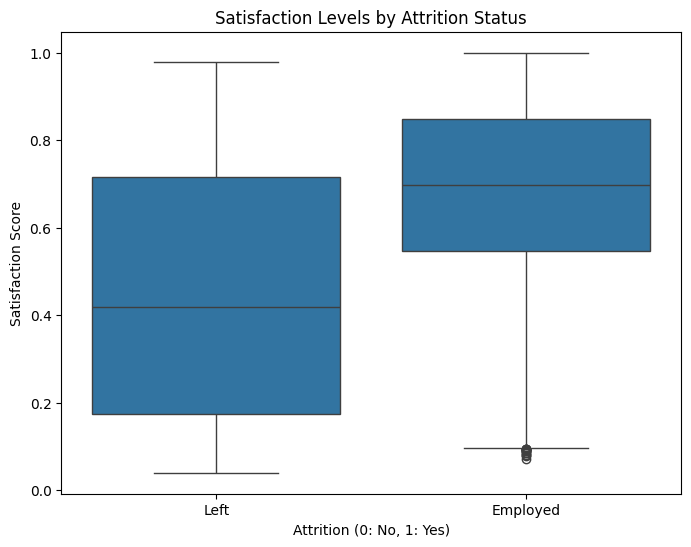

In [339]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='satisfaction', data=final_merged_data)
plt.title('Satisfaction Levels by Attrition Status')
plt.xlabel('Attrition (0: No, 1: Yes)')
plt.ylabel('Satisfaction Score')
plt.show()

**<h4>Question 4:** Correlation between Tenure and Attrition </h4>

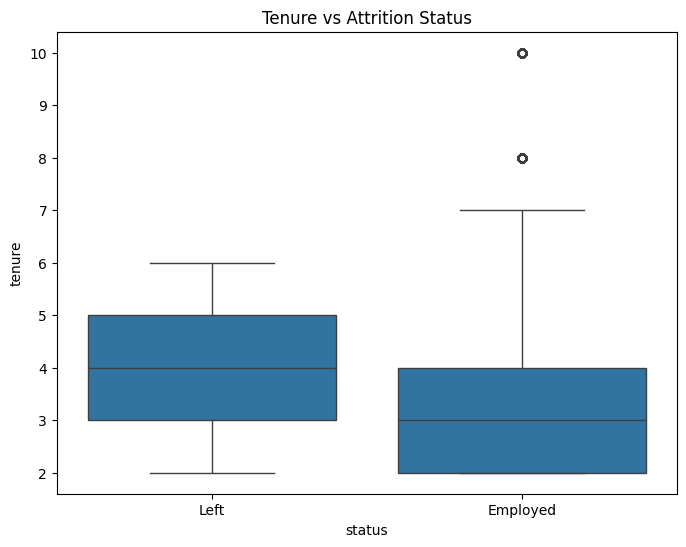

In [340]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='tenure', data=final_merged_data)
plt.title('Tenure vs Attrition Status')
plt.show()

**<h4>Question 5:** Correlation between avg monthly hours and Attrition </h4>

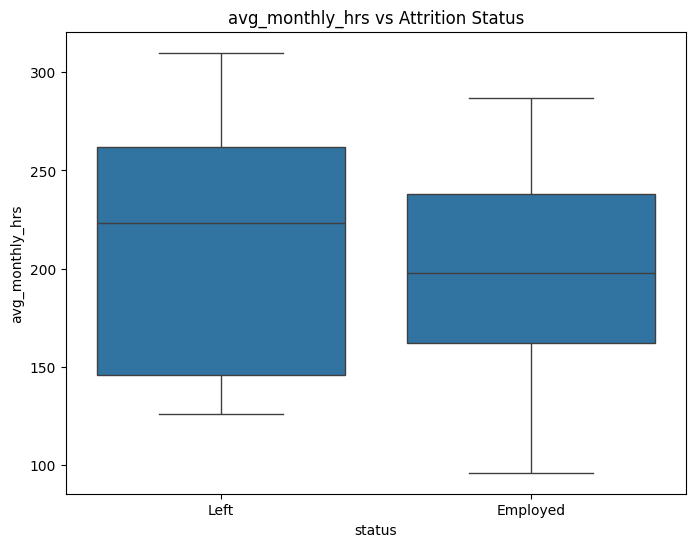

In [341]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='avg_monthly_hrs', data=final_merged_data)
plt.title('avg_monthly_hrs vs Attrition Status')
plt.show()

**6. What is the proportion of employees in each employment status (Employed/Left)?**

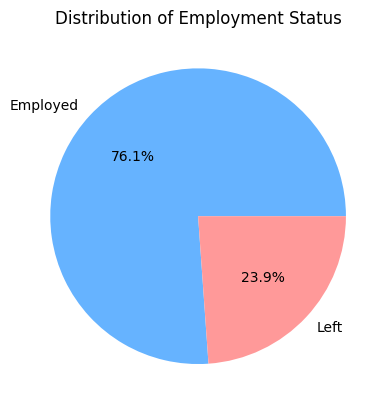

In [342]:
plt.pie(final_merged_data['status'].value_counts(), labels=final_merged_data['status'].value_counts().index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999', '#99ff99', '#ffcc99'])
plt.title('Distribution of Employment Status')
plt.show()

**7. What is the attrition in each department**

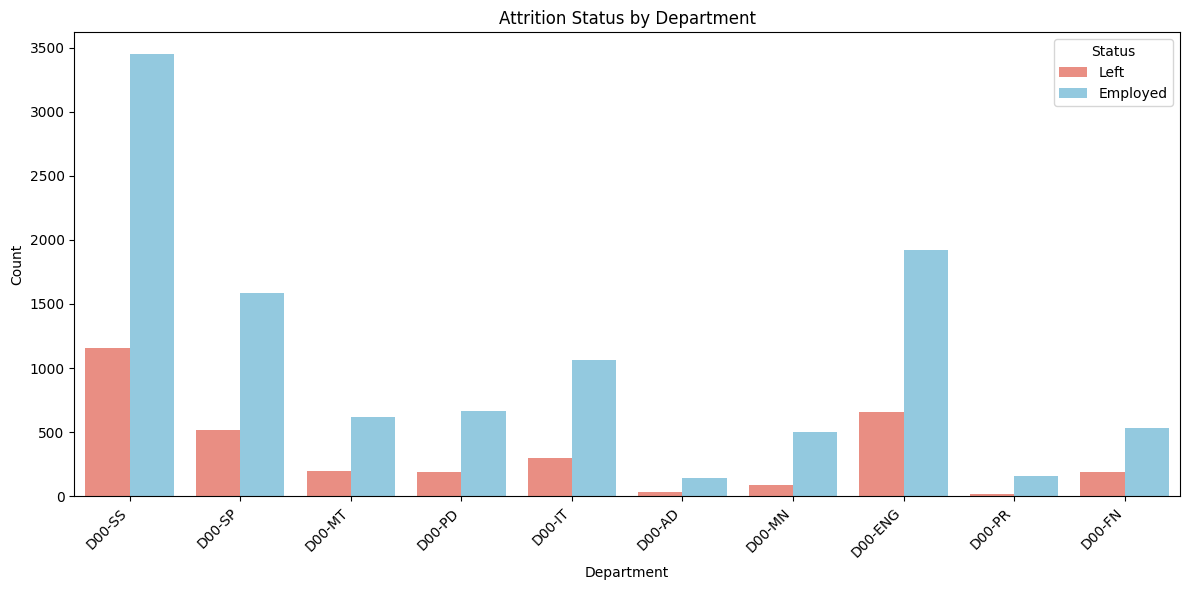

In [343]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.countplot(x='department', hue='status', data=final_merged_data, palette=['salmon','skyblue'])
plt.title('Attrition Status by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Status')
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

**8. What is the attrition % in gender**

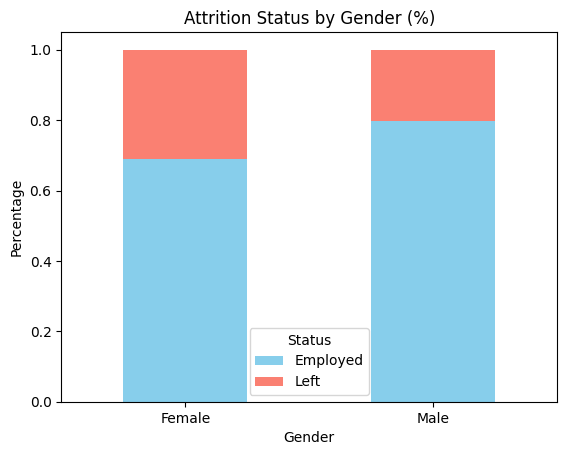

In [344]:
gender_attrition = pd.crosstab(final_merged_data['gender'], final_merged_data['status'], normalize='index')

gender_attrition.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Attrition Status by Gender (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.show()

**9. What is the attrition relation with salary**

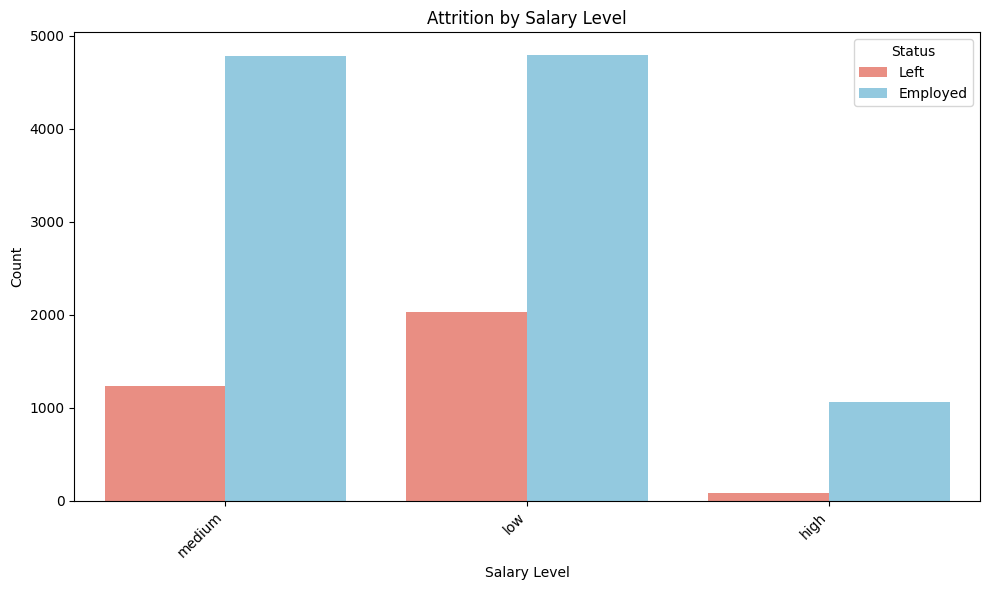

In [345]:
plt.figure(figsize=(10, 6))
sns.countplot(x='salary', hue='status', data=final_merged_data, palette=['salmon','skyblue'])
plt.title('Attrition by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

**10. What is the attrition relation with complain filed**

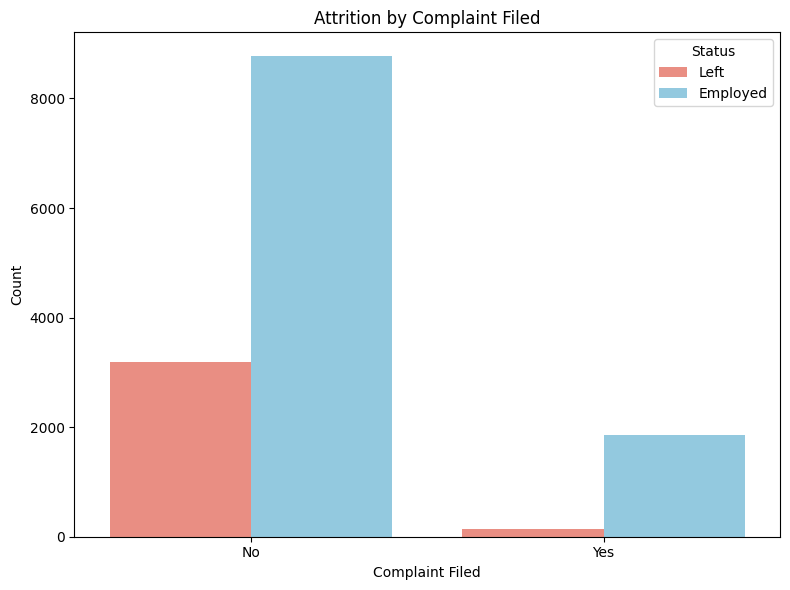

In [346]:
plt.figure(figsize=(8, 6))
sns.countplot(x='filed_complaint', hue='status', data=final_merged_data, palette=['salmon','skyblue'])
plt.title('Attrition by Complaint Filed')
plt.xlabel('Complaint Filed')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Status')
plt.tight_layout()
plt.show()

<a name = Section7></a>

---
# **7. Data Post Processing**
---

In [347]:
final_merged_data = final_merged_data.drop('dept_head', axis=1)
final_merged_data = final_merged_data.drop('dept_name', axis=1)
final_merged_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status
0,246.00000,D00-SS,False,0.86684,6,False,medium,0.13442,Left,4.00000,42,Female,Married
1,134.00000,D00-SS,False,0.55572,2,False,low,0.51104,Left,3.00000,23,Female,Unmarried
2,156.00000,D00-SS,True,0.47408,2,False,medium,0.40510,Left,3.00000,24,Female,Unmarried
3,256.00000,D00-SP,False,0.96136,6,False,low,0.15297,Left,4.00000,51,Female,Married
4,146.00000,D00-SS,False,0.50735,2,False,medium,0.43484,Left,3.00000,23,Female,Unmarried


In [348]:
encoder = LabelEncoder()

In [349]:
def encodeData(data):
    data = pd.get_dummies(data, columns=['gender', 'marital_status'], drop_first=True)

    encoder = LabelEncoder()
    data['salary'] = encoder.fit_transform(data['salary'])
    data['department'] = encoder.fit_transform(data['department'])
    return data

In [350]:
final_merged_data = encodeData(final_merged_data);

final_merged_data.head()



,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender_Male,marital_status_Unmarried
0,246.00000,9,False,0.86684,6,False,2,0.13442,Left,4.00000,42,False,False
1,134.00000,9,False,0.55572,2,False,1,0.51104,Left,3.00000,23,False,True
2,156.00000,9,True,0.47408,2,False,2,0.40510,Left,3.00000,24,False,True
3,256.00000,8,False,0.96136,6,False,1,0.15297,Left,4.00000,51,False,False
4,146.00000,9,False,0.50735,2,False,2,0.43484,Left,3.00000,23,False,True


In [351]:
unseen_data = encodeData(unseen_data);
unseen_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender_Male,marital_status_Unmarried
0,134,4,False,0.52884,2,False,1,0.40046,3.00000,119045,27,True,True
1,221,7,False,0.78456,2,False,1,0.75951,3.00000,112223,23,True,True
2,156,10,False,0.54518,2,False,2,0.33646,3.00000,103924,26,True,True
3,133,8,False,0.74813,4,False,2,0.83204,2.00000,105922,52,True,False
4,135,10,False,0.45464,2,False,1,0.32072,5.00000,103297,27,True,True


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

In [352]:
X = final_merged_data.drop('status', axis=1)
y = final_merged_data['status']
unseen_data_x = unseen_data.drop('employee_id', axis=1)
unseen_data_emp_ids = unseen_data['employee_id']

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a name = Section81></a>
### **8.1 Model development**

In [354]:
def showPerformance(predictions,y_test):
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions,pos_label='Left')
  recall = recall_score(y_test, predictions,pos_label='Left')
  f1 = f1_score(y_test, predictions,pos_label='Left')


  # Display the metrics and time took to develop the model
  print('[accuracy]:', accuracy," precision :",precision," recall :",recall,"  f1",f1,)

In [355]:
def train_and_evaluate_model(model,X_train, y_train, X_test, y_test):

  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on the trained model
  predictions = model.predict(X_test)

  # Estimating the model performance
  showPerformance(predictions,y_test)

  return model


In [356]:
model1 = LogisticRegression()
print("      performace of LogisticRegression         ")
model1 = train_and_evaluate_model(model1,X_train, y_train, X_test, y_test)

print('----------------------------------------\n')
model2 =  RandomForestClassifier()
print("      performace of RandomForestClassifier         ")
model2 =train_and_evaluate_model(model2,X_train, y_train, X_test, y_test)

print('----------------------------------------\n')

      performace of LogisticRegression         
[accuracy]: 0.7848962061560487  precision : 0.5886889460154242  recall : 0.3417910447761194   f1 0.43248347497639283
----------------------------------------

      performace of RandomForestClassifier         
[accuracy]: 0.9785254115962777  precision : 0.9780564263322884  recall : 0.9313432835820895   f1 0.9541284403669725
----------------------------------------



**Observations**
- Here we see RandomForestClassifier  is performing better so we will use this model

<a name = Section82></a>
### **8.2 Model Tunning**

In [357]:
param_dist = {"max_depth": [2,4,5],
              "min_samples_split": [2,4,7,9],
              "min_samples_leaf": [3,5,7,11],
              "bootstrap": [True, False],
              "n_estimators": [12,90,100,300,700],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(model2, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

random_search.fit(X_train, y_train)
predictions = random_search.predict(X_test)
print("      performace after tunning         ")
showPerformance(predictions,y_test)

      performace after tunning         
[accuracy]: 0.968503937007874  precision : 0.9589905362776026  recall : 0.9074626865671642   f1 0.9325153374233128


<a name = Section83></a>
### **8.3 Predicting on unseen data**

In [358]:
predictions = random_search.predict(unseen_data_x)

In [359]:
data = {'employee_id': unseen_data_emp_ids, 'status': predictions}
predictions_df= pd.DataFrame(data)
predictions_df.to_excel('predictions.xlsx', index=False,header=False)

<a name = Section9></a>

---
# **9. Conclusions**
---
- Average satisfaction of employees who stay is 0.7 and avg satisfaction of employee who left is appx 0.4

- Average tenure of employees who left is 4 years so appx after 4 years employees are leaving company.

- Employees who are working more than 220 hrs are having higher chances to leave.
- Employees who are working less than 200 hrs are having more chances to stay.

- Male emploees are appx double of female employees
Appx 24% employees are leaving.

- Department D00-SS and D00-Eng have higher attrition.

- Female attrition is more than male employees.
- Employee with low salary are leaving more